## Lecture 9: Linear Regression Example

In this notebook, we show how to learn a linear regression model from labeled data and use the model to make predictions on unlabeled data.

In [1]:
%matplotlib inline   
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read data from CityTemps.csv
lats=[]
lngs=[]
temps=[]
with open('CityTemps.csv', 'rU') as data:
    reader = csv.reader(data)
    reader.next() # header line
    for row in reader:
        lats.append(float(row[2]))
        lngs.append(float(row[3]))
        temps.append(float(row[4]))

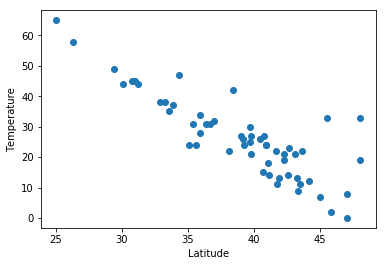

In [3]:
# Create scatterplot
# lats is a list of x values, temps is a list of y values. (lats[0], temps[0]) is one point.
plt.plot(lats,temps,'o') 

# Add labels to axes
plt.xlabel("Latitude")
plt.ylabel("Temperature")

# Tell python to display the plot
plt.show()

In [4]:
# compute linear regression fit line using python numpy package
# a, b are the parameters of the line y = ax + b
a,b = np.polyfit(lats, temps, 1)

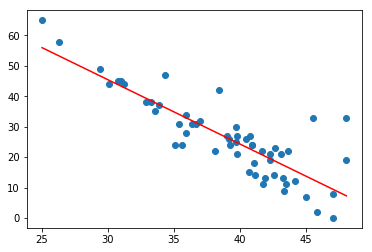

In [5]:
# Add line to the previous scatter plot

# Scatter plot
plt.plot(lats,temps,'o')

# Linear regression line
# Specify end points of the line: plt.plot([x_start, x_end], [y_start, y_end])
plt.plot([min(lats), max(lats)], [a*min(lats)+b, a*max(lats)+b], color='red')

# Tell python to display the plot
plt.show()

In [6]:
# Compute and print correlation coefficients
cc = np.corrcoef(lats,temps)[0,1]
print 'Correlation coefficient for temperature versus latitude:', cc
cc = np.corrcoef(lngs,temps)[0,1]
print 'Correlation coefficient for temperature versus longitude:', cc


Correlation coefficient for temperature versus latitude: -0.848035205867
Correlation coefficient for temperature versus longitude: 0.0239415743907


### Step 2: Use trained model to predict the temperature for cities

In [ ]:
# Create dictionary of city latitudes, mapping each city to its latitude
citylats = {}
with open('CityLats.csv', 'rU') as data:
    reader = csv.reader(data)
    reader.next() # header line
    for row in reader:
        citylats[row[0]] = float(row[1])

In [ ]:
# For each city entered, try to find it in the dictionary. 
# If in dictionary, get its latitude and pass it into the linear regression model to get the temprature prediction.
while True:
    city = raw_input('Enter city name: ')
    if city in citylats:
        temp = a*citylats[city] + b
        print 'Predicted January low temperature:', temp
    else: print 'City not found'


Enter city name: San Francisco
Predicted January low temperature: 28.9365309531
Enter city name: Boston
Predicted January low temperature: 18.7930925252
Enter city name: New York
Predicted January low temperature: 22.5168568302
